# Goal

* creating iTOL files for mapping alpha diversity onto `SpecD` host cladogram
* using mean of alpha diversity for all IndD samples falling into each SpecD group

# Var

In [66]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map/'

# phyloseq
physeq_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq//physeq_IndD.RDS'
physeq_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq//physeq_SpecD.RDS'


# alpha-div calculated with qiime2
qiime2_alpha_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/table_merged_filt2_r5k_filt/core_metrics_phylo/'
qiime2_arts = c(
    'observed_OTUs' = 'observed_otus_vector.qza',
    'shannon' = 'shannon_vector.qza',
    'faith_PD' = 'faith_pd_vector.qza',
    'evenness' = 'evenness_vector.qza'
)

conda_env = 'qiime2'

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)
library(phyloseq)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“replacing previous import ‘stats::sd’ by ‘BiocGenerics::sd’ when loading ‘S4Vectors’”Warning message:
“replacing previous import ‘stats::var’ by ‘BiocGenerics::var’ when loading ‘S4Vectors’”Warning message:
“multiple methods tables found for ‘var’”Warning message:
“multiple methods tables found for ‘sd’”Warning message:
“multiple methods tables found for ‘rowSums’”Warning message:
“multiple methods tables found for ‘colSums’”Warning message:
“multiple methods tables found for ‘rowMeans’”Warning message:
“multiple methods tables found for ‘colMeans’”Warning message:
“replacing previous import ‘BiocGenerics::rowSums’ by ‘S4Vectors::rowSums’ when loading ‘Biostrings’”Warning message:
“replacing previous import ‘BiocGenerics::var’ by ‘S4Vectors::var’ when loading ‘Biostrings’”W

In [6]:
setwd(qiime2_alpha_dir)

# Converting artifacts to tables

In [11]:
artifact_export = function(file_name, output_name, conda_env){
    # export qiime2 artifact
    cmd = 'qiime tools export --output-dir %s %s'
    cmd = sprintf(cmd, output_name, file_name)
    bash_job(cmd, conda_env)
}

for(i in names(qiime2_arts)){
    artifact_export(qiime2_arts[i],
                    file.path(qiime2_alpha_dir, i),
                    conda_env)
}

# Load

## Phyloseq

In [69]:
physeq = readRDS(physeq_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 31209 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 100 sample variables ]
tax_table()   Taxonomy Table:    [ 31209 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 31209 tips and 30658 internal nodes ]

In [71]:
metadata_IndD = physeq %>% 
    sample_data %>% 
    as.matrix %>% 
    as.data.frame %>%
    mutate(SampleID = rownames(.),
           SampleID = gsub('^X([0-9]+)', '\\1', SampleID))
metadata_IndD %>% status

Warning message in as.matrix.data.frame(.):
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 221 101


BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subj_id,host_common_name,scientific_name,scientific_name_subspecies,⋯,Ct_A_2,Ct_B_2,Amount_SYBR_copies_in_5_ul_A_2,Amount_SYBR_copies_in_5_ul_B_2,Amount_geometric_mean_SYBR_2,Copies_in_5_ul_PCR_template_2,Copies_per_100_ul_extract_2,wellplate_Illumina,wellplate_position_Illumina,SampleID
ACTCACGGTATG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0049,1,1,Eurasian.Beaver,Castor fiber,NA,⋯,NA,NA,NA,NA,NA,NA,NA,2,B12,1.Eurasian.Beaver
ACGACGTCTTAG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0030,101,101,Horse,Equus caballus,NA,⋯,11.66,NA,2.130E+8X,NA,NA,3.41e+09,6.82e+10,4,E8,101.Horse
ACGAGTGCTATC,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0031,102,102,Kulan,Equus hemionus,Equus hemionus kulan,⋯,16.89,NA,6.820E+6X,NA,NA,1.09e+08,2.18e+09,4,E9,102.Kulan


In [72]:
physeq = readRDS(physeq_SpecD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 19190 taxa and 131 samples ]
sample_data() Sample Data:       [ 131 samples by 100 sample variables ]
tax_table()   Taxonomy Table:    [ 19190 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 19190 tips and 18939 internal nodes ]

In [101]:
metadata_SpecD = physeq %>% 
    sample_data %>% 
    as.matrix %>% 
    as.data.frame %>%
    mutate(SampleID = rownames(.),
           SpecD_ID = gsub('^[A-Z][0-9]+b*\\.', '', SampleID))
metadata_SpecD %>% status

Warning message in as.matrix.data.frame(.):
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 131 102


BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subj_id,host_common_name,scientific_name,scientific_name_subspecies,⋯,Ct_B_2,Amount_SYBR_copies_in_5_ul_A_2,Amount_SYBR_copies_in_5_ul_B_2,Amount_geometric_mean_SYBR_2,Copies_in_5_ul_PCR_template_2,Copies_per_100_ul_extract_2,wellplate_Illumina,wellplate_position_Illumina,SampleID,SpecD_ID
ACTCACGGTATG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0049,1,1,Eurasian.Beaver,Castor fiber,NA,⋯,NA,NA,NA,NA,NA,NA,2,B12,X1.Eurasian.Beaver,Eurasian.Beaver
ACTGTCGAAGCT,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0057,109,109,Red.Fox,Vulpes vulpes,NA,⋯,NA,2.340E+7X,NA,NA,3.74e+08,7.49e+09,4,F2,X109.Red.Fox,Red.Fox
ACACGGTGTCTA,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0011,116,116,Common.Kestrel,Falco tinnunculus,NA,⋯,NA,5.210E+5X,NA,NA,8.34e+06,1.67e+08,1,C11,X116.Common.Kestrel,Common.Kestrel


## Alpha diversity

In [102]:
load_alpha = function(file_name, alpha_div, base_dir){
    in_file = file.path(base_dir, alpha_div, file_name)
    read.delim(in_file, sep='\t', row.names=1)
}

alphas = list()
for(i in names(qiime2_arts)){
    df = load_alpha('alpha-diversity.tsv', i, qiime2_alpha_dir)
    colnames(df) = c('value')
    df$metric = i
    alphas[[i]] = df
}

alphas = do.call(rbind, alphas) %>%
    mutate(SampleID = gsub('^.*?\\.', '', rownames(.)))
alphas %>% status

[1] 968   3


value,metric,SampleID
105,observed_OTUs,1.Eurasian.Beaver
467,observed_OTUs,101.Horse
285,observed_OTUs,102.Kulan


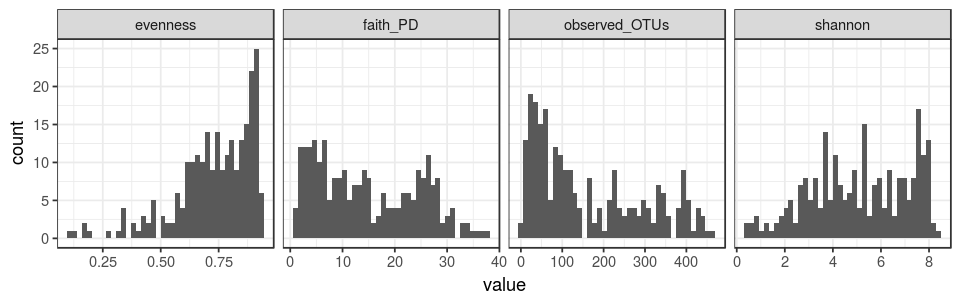

In [103]:
p = ggplot(alphas, aes(value)) +
    geom_histogram(bins=40) +
    facet_grid(. ~ metric, scales='free_x') +
    theme_bw()

options(repr.plot.width=8, repr.plot.height=2.5)
plot(p)

# Format for iTOL

## Grouping by SpecD ID

In [104]:
# IndD
tmp = metadata_IndD %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name)

# checking overlap; 
setdiff(unique(alphas$SampleID), unique(tmp$SampleID)) %>% sort %>% print
setdiff(unique(tmp$SampleID), unique(alphas$SampleID)) %>% sort %>% print

# joining
alphas_j = alphas %>%
    inner_join(tmp, c('SampleID'))

alphas_j %>% status

 [1] "144.Cattle"       "146.Cattle"       "148.Cattle"       "150.Cattle"      
 [5] "195.Domestic.Cat" "206.Red.Sheep"    "209.Red.Sheep"    "309.Domestic.Cat"
 [9] "310.Domestic.Cat" "311.Domestic.Cat" "312.Domestic.Cat" "314.Red.Deer"    
[13] "315.Red.Deer"     "316.Red.Deer"     "317.Red.Deer"     "318.Red.Deer"    
[17] "319.Red.Deer"     "321.Red.Deer"     "322.Red.Deer"     "323.Red.Deer"    
[21] "324.Red.Deer"    
character(0)
[1] 884   8


value,metric,SampleID,class,order,family,genus,scientific_name
105,observed_OTUs,1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor fiber
467,observed_OTUs,101.Horse,Mammalia,Perissodactyla,Equidae,Equus,Equus caballus
285,observed_OTUs,102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,Equus hemionus


In [105]:
# IndD
tmp = metadata_SpecD %>%
    dplyr::select(SpecD_ID, scientific_name)

# joining
alphas_j = alphas_j %>%
    inner_join(tmp, c('scientific_name')) 

alphas_j %>% status

[1] 884   9


value,metric,SampleID,class,order,family,genus,scientific_name,SpecD_ID
105,observed_OTUs,1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor fiber,Eurasian.Beaver
467,observed_OTUs,101.Horse,Mammalia,Perissodactyla,Equidae,Equus,Equus caballus,Przewalski.horse
285,observed_OTUs,102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,Equus hemionus,Onager


In [106]:
# number of samples per SpecD 
alphas_j %>%
    distinct(SampleID, SpecD_ID) %>%
    group_by(SpecD_ID) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.687   2.000  11.000 

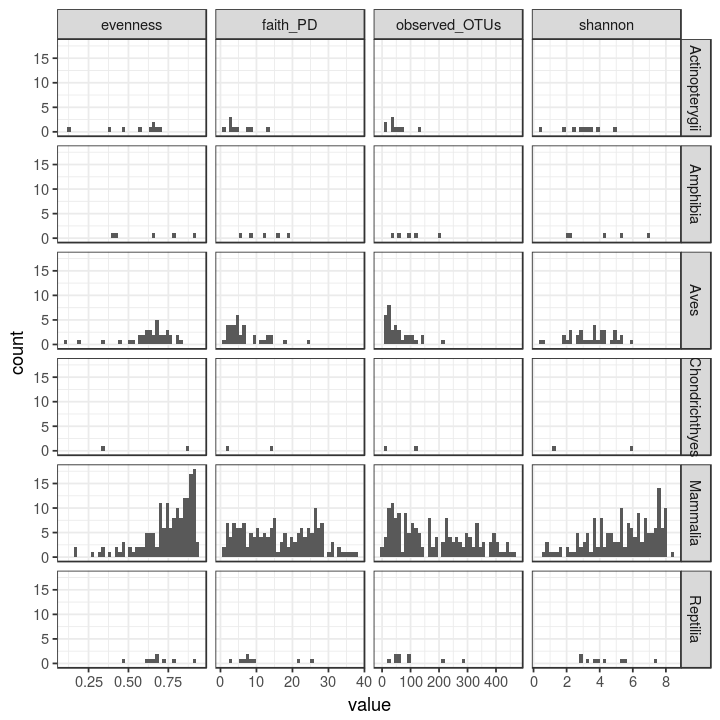

In [107]:
# distribution by alpha-div metric & host-class
p = ggplot(alphas_j, aes(value)) +
    geom_histogram(bins=40) +
    facet_grid(class ~ metric, scales='free_x') +
    theme_bw()

options(repr.plot.width=6, repr.plot.height=6)
plot(p)

## Writing file

In [108]:
# formatting
m = alphas_j %>%
    group_by(SpecD_ID, metric) %>%
    summarize(minimum = min(value),
              q1 = quantile(value, 0.25),
              median = median(value),
              q3 = quantile(value, 0.75),
              maximum = max(value)) %>%
    ungroup()
m %>% status

[1] 524   7


SpecD_ID,metric,minimum,q1,median,q3,maximum
Aesculapian.Snake,evenness,0.6760079,0.6760079,0.6760079,0.6760079,0.6760079
Aesculapian.Snake,faith_PD,8.6047813,8.6047813,8.6047813,8.6047813,8.6047813
Aesculapian.Snake,observed_OTUs,91.0000000,91.0000000,91.0000000,91.0000000,91.0000000


In [110]:
# spliting by metric & writing each to file
write_itol_file = function(df, metric, out_file, work_dir){
    itol_box_file = file.path(work_dir, out_file)
    
    cat('DATASET_BOXPLOT\n', file=itol_box_file)
    cat('SEPARATOR SPACE\n', file=itol_box_file, append=TRUE)
    cat(sprintf('DATASET_LABEL %s\n', metric), file=itol_box_file, append=TRUE)
    cat('COLOR #ff0000\n', file=itol_box_file, append=TRUE)
    cat('DATA\n', file=itol_box_file, append=TRUE)
    write.table(df, file=itol_box_file, append=TRUE, sep=' ', 
                quote=FALSE, row.names=FALSE, col.names=FALSE)
    cat('File written:', itol_box_file, '\n')
}

for(x in unique(m$metric)){
    m_f = m[m$metric==x,]
    m_f$metric = NULL
    out_file = paste0(x, '_iTOL-boxplot.txt')
    write_itol_file(m_f, x, out_file, work_dir)
}

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map//evenness_iTOL-boxplot.txt 
File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map//faith_PD_iTOL-boxplot.txt 
File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map//observed_OTUs_iTOL-boxplot.txt 
File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map//shannon_iTOL-boxplot.txt 
